<a href="https://colab.research.google.com/github/vishnuv0007/ICT_internship/blob/main/ICT_Internship_LoyaltyPrediction_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Inspection**

In [ ]:
#loading the given dataset to python environment
df=pd.read_csv('/content/Electronic - Electronic.csv.csv')
df

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24,1,39.583865,46.041613,1.000000,0,Male,West,Television,Credit Card,-64.457793,4.187345,9.136240,0.0,Morning
4996,66,5,172.486538,32.751346,1.000000,0,Male,East,Accessories,Debit Card,138.772917,3.868131,1.961965,0.0,Evening
4997,26,11,493.388104,5.000000,2.324783,0,Male,North,Television,Net Banking,1010.219124,4.172183,16.750489,0.0,Evening
4998,53,10,260.269589,23.973041,5.000000,1,Female,West,Accessories,Debit Card,1114.585926,3.942221,25.562475,1.0,Afternoon


In [ ]:
#basic info of the dataset to understand the datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [ ]:
#statistical description of the dataset
df.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


In [ ]:
#checking for the missing values
df.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


**Data Cleaning**

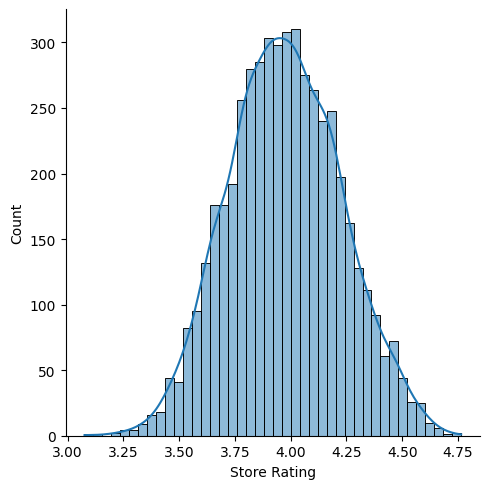

In [ ]:
#Checking distribution of 'Store Rating' column
sns.displot(data=df,x='Store Rating',kde=True)

It is found that only a very small percentage of values are missing.
1. Categorical columns (Gender, Payment Method, Membership Status and   
   Preferred Visit Time) can be filled using mode.
2. Continuous numerical column (Store Rating) is having normal
   distribution. So missing values can be filled with mean

In [ ]:
cal_col_df=['Gender', 'Payment Method', 'Membership Status', 'Preferred Visit Time']
for i in cal_col_df:
  df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

<ipython-input-89-26d990352afe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


In [ ]:
df['Store Rating'].fillna(df['Store Rating'].mean(),inplace=True)
df.isna().sum()

<ipython-input-90-9e208dd007e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Store Rating'].fillna(df['Store Rating'].mean(),inplace=True)


,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


<Axes: >

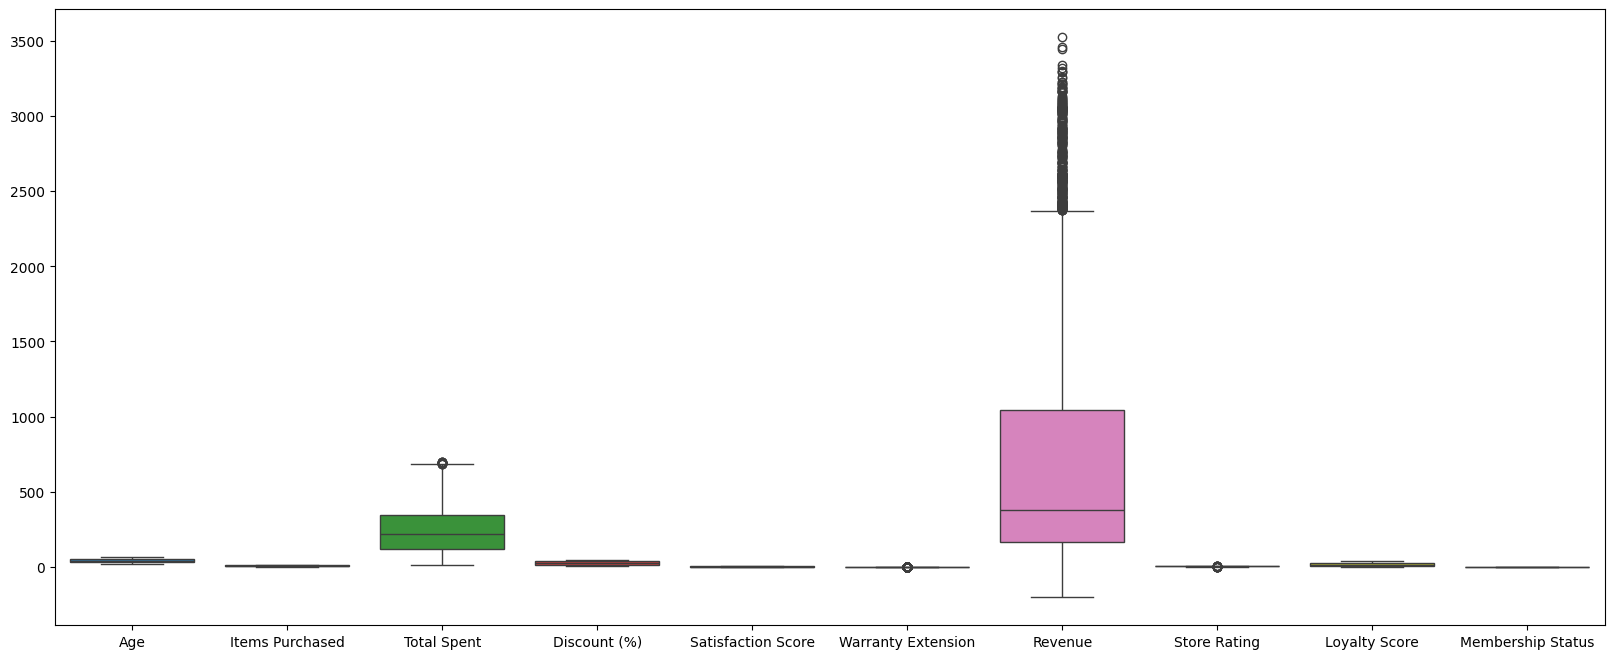

In [ ]:
#Checking outliers in numerical coluns using boxplot
df_boxplot=df.select_dtypes(exclude='object')
plt.figure(figsize=(20,8))
sns.boxplot(data=df_boxplot)

**Exploratory Data Analysis**

In [ ]:
#Checking correltion btw numerical variables
corr_matrix=df.select_dtypes(exclude='object').corr()
corr_matrix

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
Age,1.000000,-0.005522,-0.003212,0.000439,0.000331,-0.034065,-0.006344,-0.023029,0.009317,0.000485
Items Purchased,-0.005522,1.000000,0.836032,-0.853837,0.494572,0.064381,0.674361,0.017564,0.557782,0.006543
Total Spent,-0.003212,0.836032,1.000000,-0.979015,0.597239,0.121439,0.882421,0.013547,0.669716,-0.000557
Discount (%),0.000439,-0.853837,-0.979015,1.000000,-0.589436,-0.086038,-0.829426,-0.013681,-0.659179,0.004464
Satisfaction Score,0.000331,0.494572,0.597239,-0.589436,1.000000,0.062950,0.786229,0.010493,0.935086,0.026250
Warranty Extension,-0.034065,0.064381,0.121439,-0.086038,0.062950,1.000000,0.130036,0.016729,0.076038,0.011061
Revenue,-0.006344,0.674361,0.882421,-0.829426,0.786229,0.130036,1.000000,0.010915,0.808505,0.014882
Store Rating,-0.023029,0.017564,0.013547,-0.013681,0.010493,0.016729,0.010915,1.000000,0.007269,0.001616
Loyalty Score,0.009317,0.557782,0.669716,-0.659179,0.935086,0.076038,0.808505,0.007269,1.000000,0.020058
Membership Status,0.000485,0.006543,-0.000557,0.004464,0.026250,0.011061,0.014882,0.001616,0.020058,1.000000


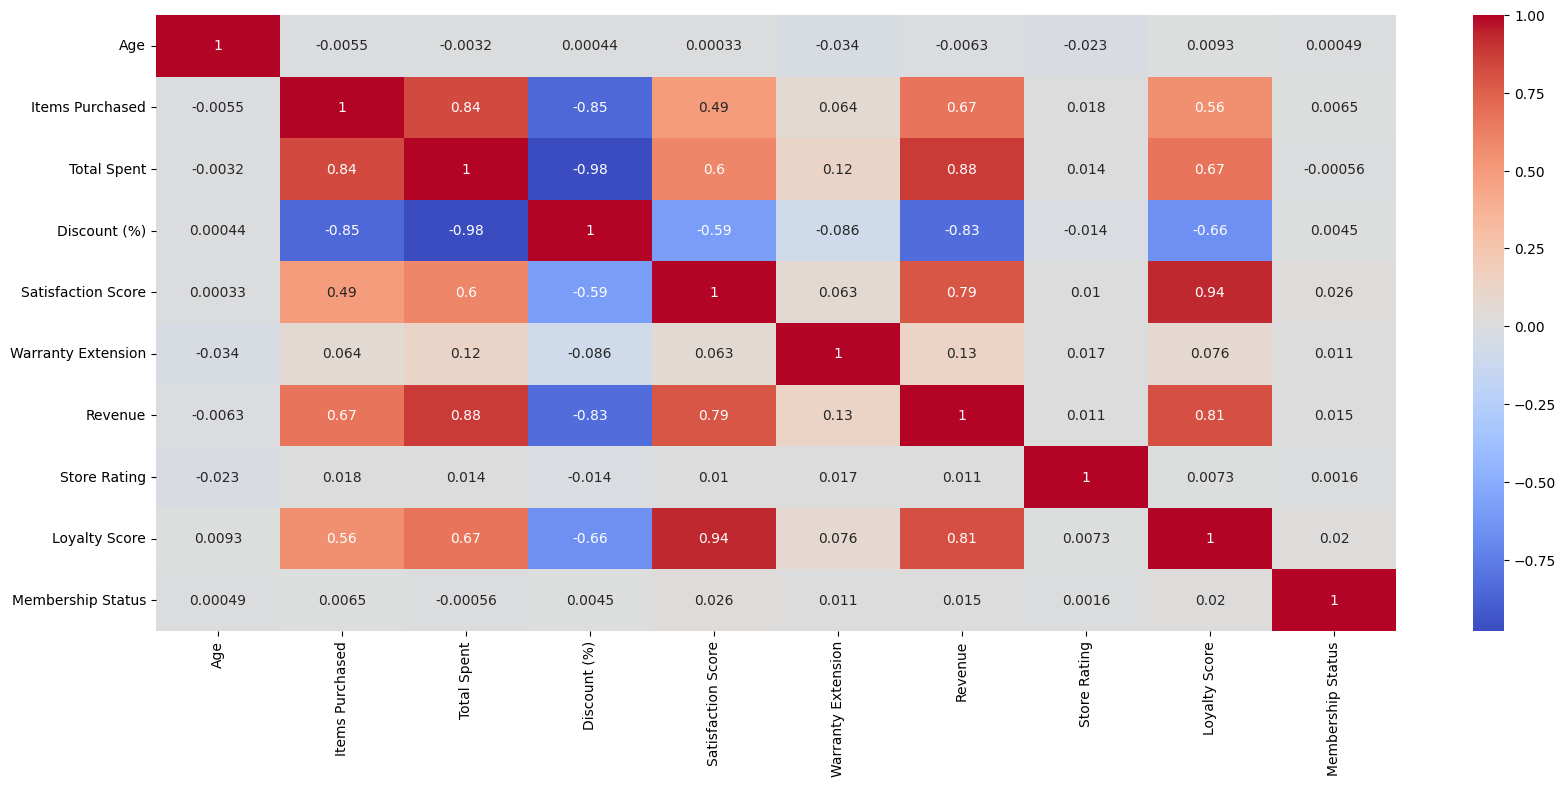

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True);

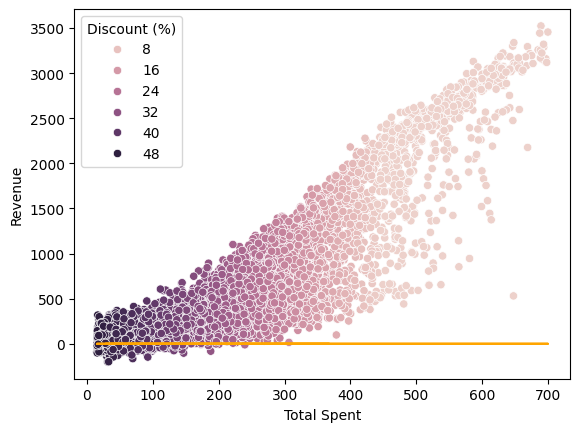

In [ ]:
sns.scatterplot(data=df,x='Total Spent',y='Revenue',hue='Discount (%)')
slope = 0
intercept = 0
line = slope * (df['Total Spent'] + intercept)

# Plot the scatter plot and custom line
plt.plot(df['Total Spent'], line, color='orange', linestyle='-', label='Custom Line')

<Axes: xlabel='Discount (%)', ylabel='Loyalty Score'>

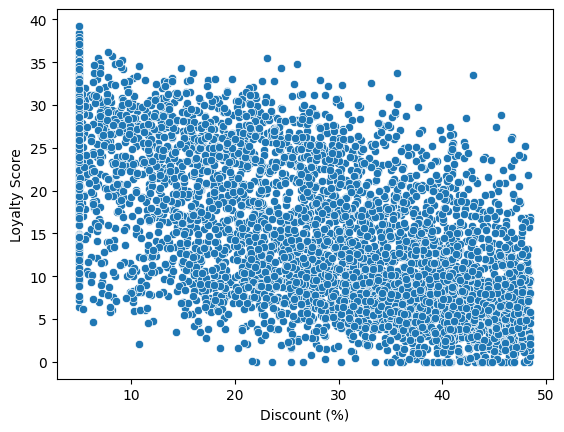

In [ ]:
sns.scatterplot(data=df,x='Discount (%)',y='Loyalty Score')

<Axes: xlabel='Total Spent', ylabel='Discount (%)'>

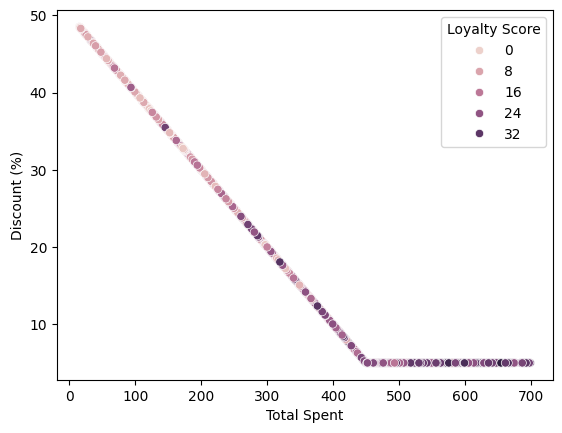

In [ ]:
sns.scatterplot(data=df,x='Total Spent',y='Discount (%)',hue='Loyalty Score')

<Axes: xlabel='Total Spent', ylabel='Discount (%)'>

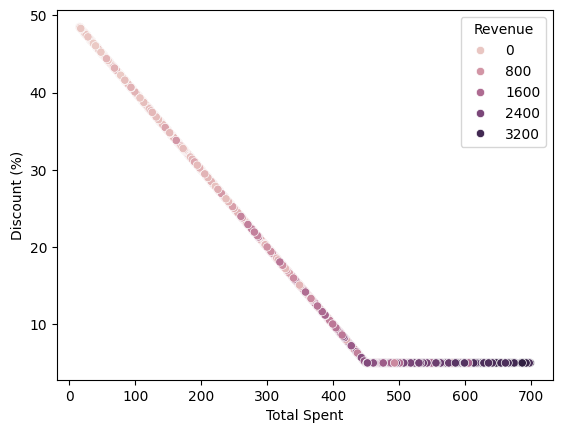

In [ ]:
sns.scatterplot(data=df,x='Total Spent',y='Discount (%)',hue='Revenue')

<Axes: xlabel='Revenue', ylabel='Discount (%)'>

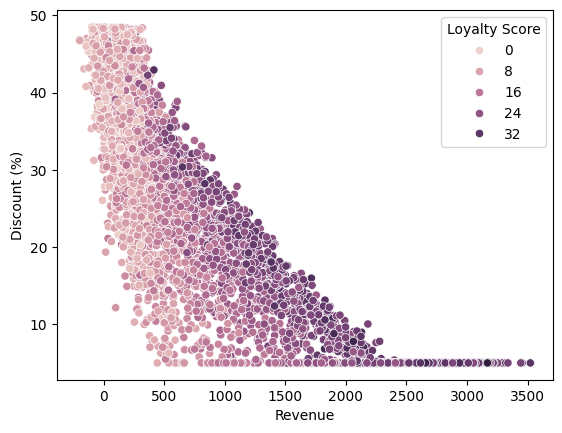

In [ ]:
sns.scatterplot(data=df,x='Revenue',y='Discount (%)',hue='Loyalty Score')

<Axes: xlabel='Discount (%)'>

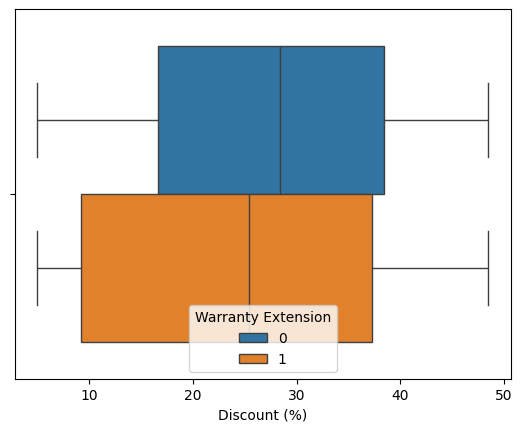

In [ ]:
sns.boxplot(data=df,x='Discount (%)',hue='Warranty Extension')

<Axes: xlabel='Loyalty Score'>

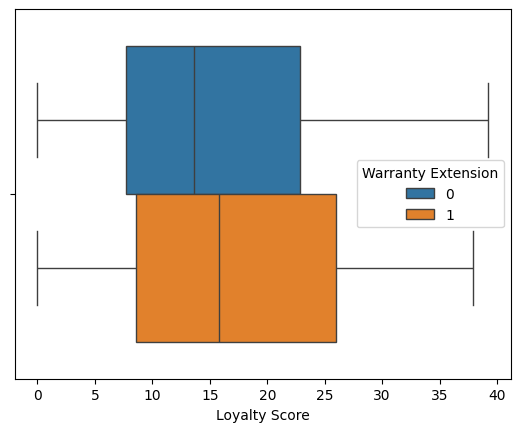

In [ ]:
sns.boxplot(data=df,x='Loyalty Score',hue='Warranty Extension')

<Axes: xlabel='Loyalty Score'>

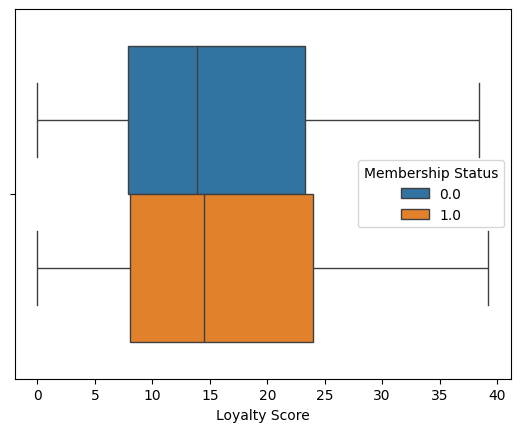

In [ ]:
sns.boxplot(data=df,x='Loyalty Score',hue='Membership Status')

**Univariate Analysis of numerical features**

<Axes: ylabel='Age'>

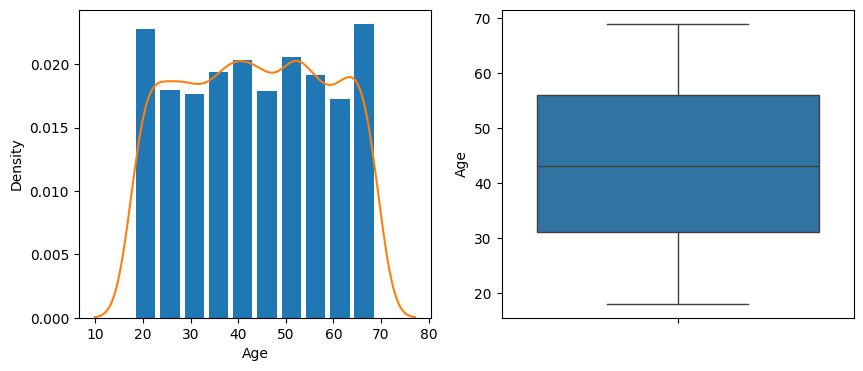

In [ ]:
# Univariate Analysis - 'Age' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Age'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Age')

<Axes: ylabel='Items Purchased'>

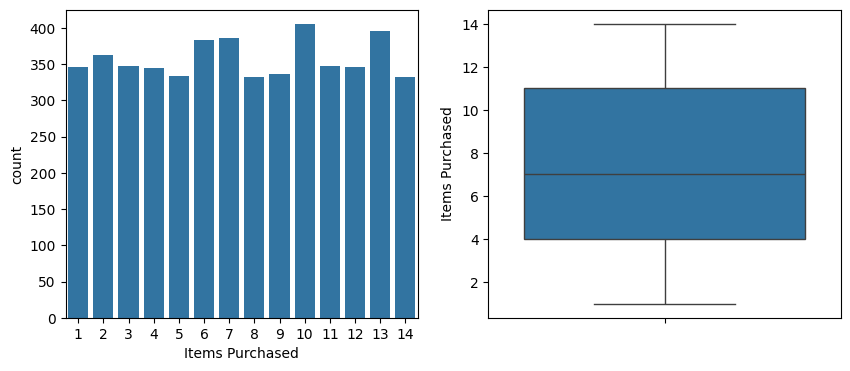

In [ ]:
# Univariate Analysis - 'Items Purchased' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Items Purchased')

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Items Purchased')

<Axes: ylabel='Total Spent'>

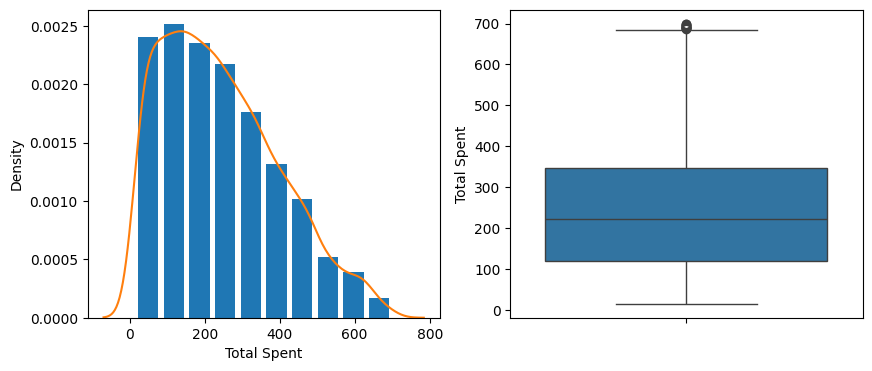

In [ ]:
# Univariate Analysis - 'Total Spent' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#sns.displot(df['Total Spent'],kde=True)
plt.hist(df['Total Spent'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Total Spent'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Total Spent')

<Axes: ylabel='Discount (%)'>

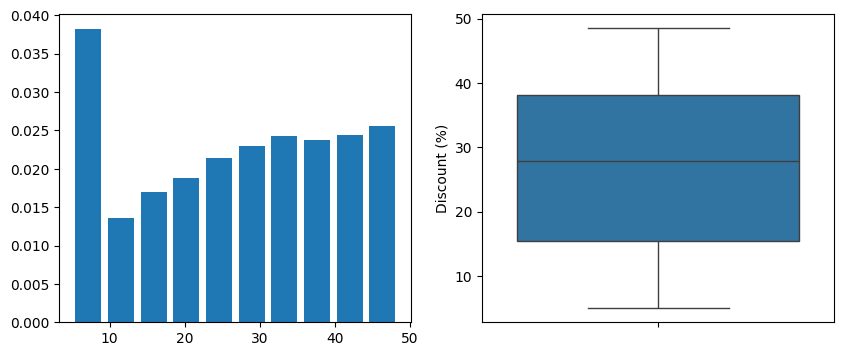

In [ ]:
# Univariate Analysis - 'Discount' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Discount (%)'],bins=10,rwidth=0.8,density=True)
#sns.kdeplot(df['Total Spent'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Discount (%)')

<Axes: ylabel='Satisfaction Score'>

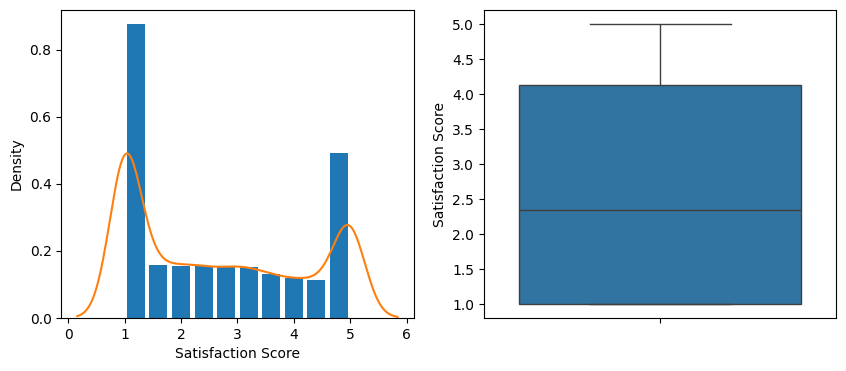

In [ ]:
# Univariate Analysis - 'Satisfaction Score' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Satisfaction Score'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Satisfaction Score'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Satisfaction Score')

<Axes: ylabel='Revenue'>

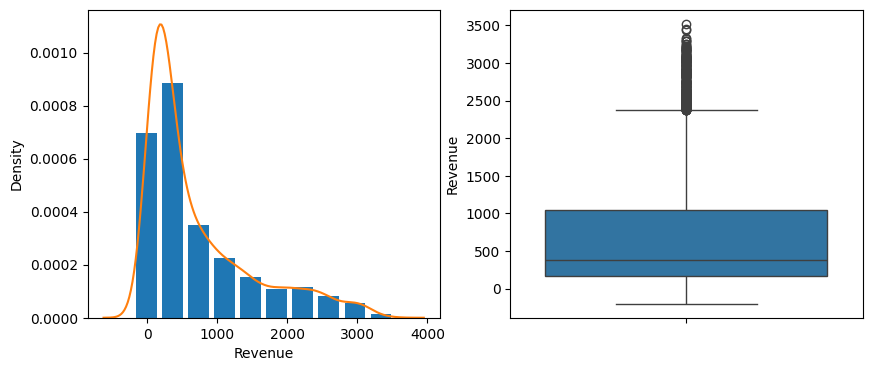

In [ ]:
# Univariate Analysis - 'Revenue' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Revenue'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Revenue'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Revenue')

<Axes: ylabel='Store Rating'>

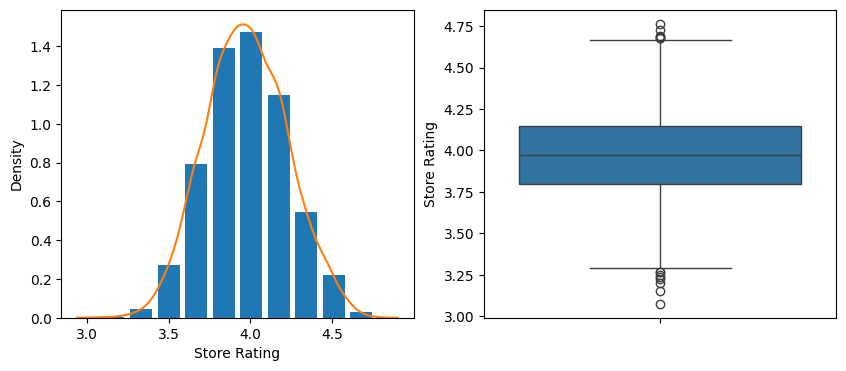

In [ ]:
# Univariate Analysis - 'Store Rating' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Store Rating'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Store Rating'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Store Rating')

<Axes: ylabel='Loyalty Score'>

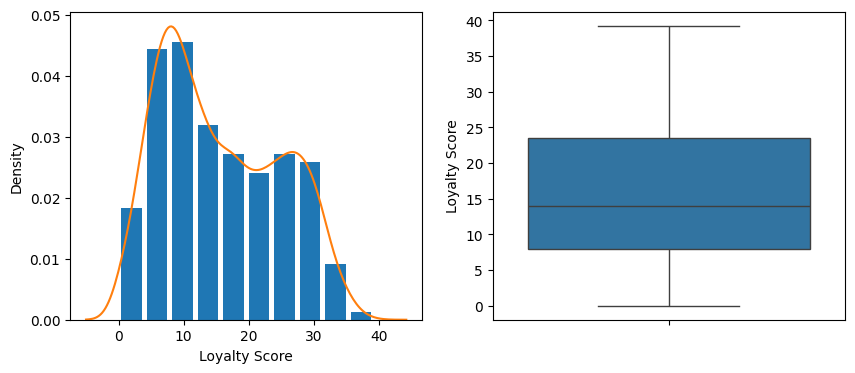

In [ ]:
# Univariate Analysis - 'Loyalty Score' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Loyalty Score'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Loyalty Score'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Loyalty Score')

1. Features like Total Spent, Discount, Revenue, follows skewed distribution, hence these features need to be scled using standard scaling.
2. Store Rting follows normal distribution

**Univariate analysis of categorical features**

<Axes: xlabel='Warranty Extension'>

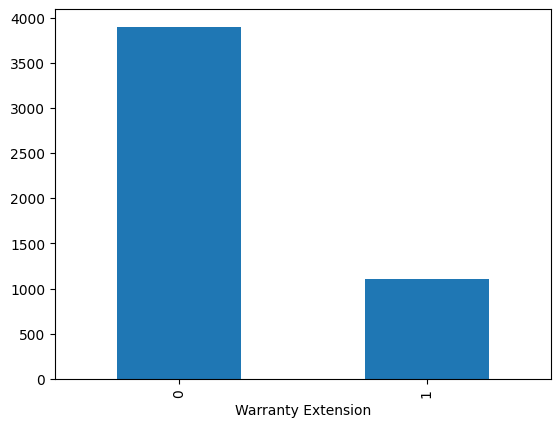

In [ ]:
# Univariate Analysis - 'Warranty Extension' column
df['Warranty Extension'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

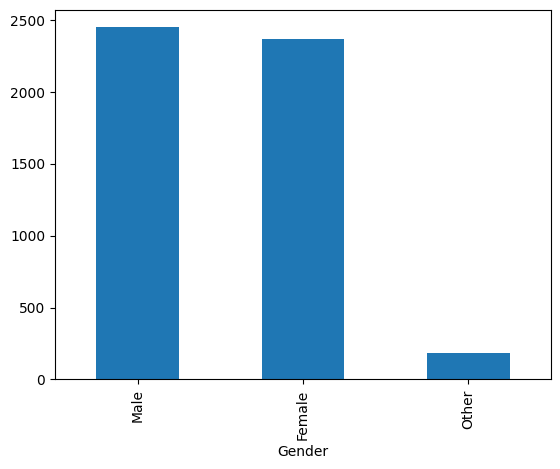

In [ ]:
# Univariate Analysis - 'Gender' column
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Region'>

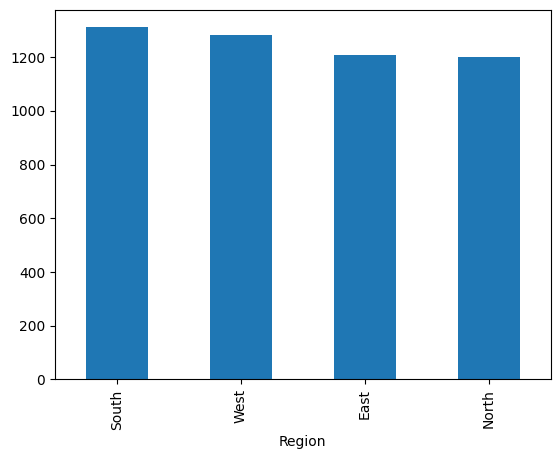

In [ ]:
# Univariate Analysis - 'Region' column
df['Region'].value_counts().plot(kind='bar')

<Axes: xlabel='Product Category'>

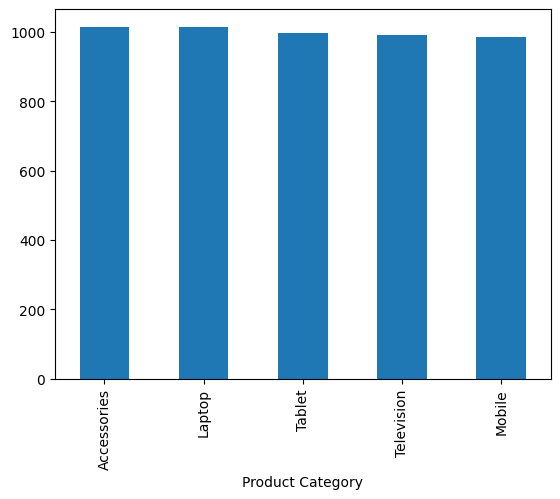

In [ ]:
# Univariate Analysis - 'Product Category' column
df['Product Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Payment Method'>

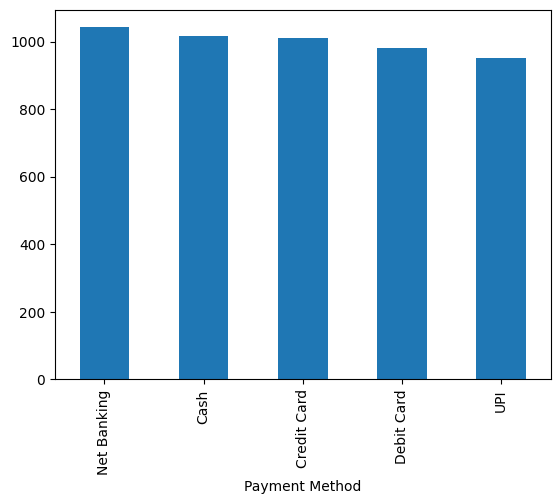

In [ ]:
# Univariate Analysis - 'Payment Method' column
df['Payment Method'].value_counts().plot(kind='bar')

<Axes: xlabel='Membership Status'>

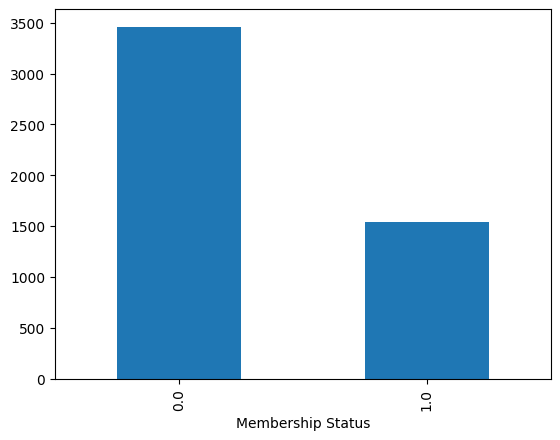

In [ ]:
# Univariate Analysis - 'Membership Status' column
df['Membership Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Preferred Visit Time'>

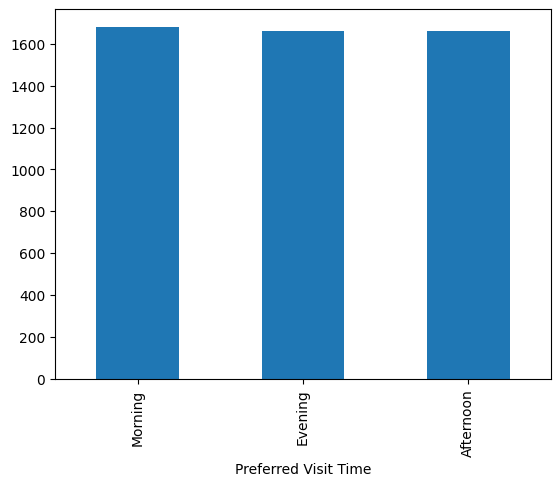

In [ ]:
# Univariate Analysis - 'Preferred Visit Time' column
df['Preferred Visit Time'].value_counts().plot(kind='bar')

1. Features like Region, product category, payment method, preferred visit time are having equal number of entries.
2. Number of customers having membership is almost 50 % less that of customers who do not have membership.
3. Number of customers who got warranty extension is less compared to those who did not get warranty extenson.
4. Male and Female customers also found to be same

**Bivariate Analysis**

Bivariate analysis is done btw all columns wrt target variable (Loyalty score)

<Axes: ylabel='Loyalty Score'>

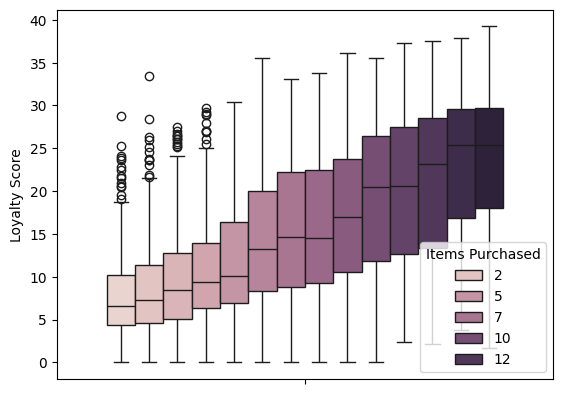

In [ ]:
#Loyalty score vs Items Purchased
sns.boxplot(data=df,y='Loyalty Score',hue='Items Purchased')

It is found that loyalty score is increasing when items purchased is more

<Axes: xlabel='Total Spent', ylabel='Loyalty Score'>

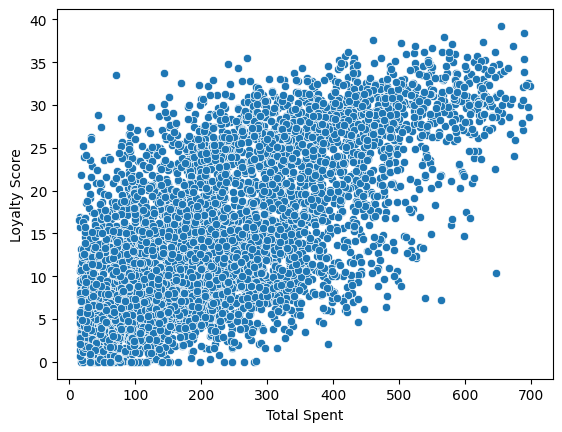

In [ ]:
#Loyalty score vs Total Spent
sns.scatterplot(data=df,x='Total Spent',y='Loyalty Score')

Loyalty and total spent has positive relation




<Axes: xlabel='Discount (%)', ylabel='Loyalty Score'>

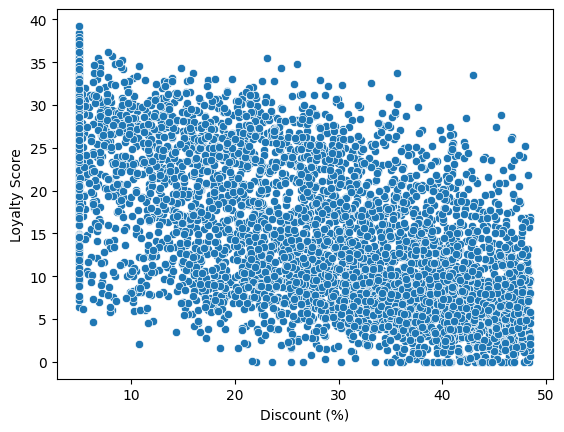

In [ ]:
#Loyalty score vs Discount
sns.scatterplot(data=df,x='Discount (%)',y='Loyalty Score')

<Axes: xlabel='Revenue', ylabel='Loyalty Score'>

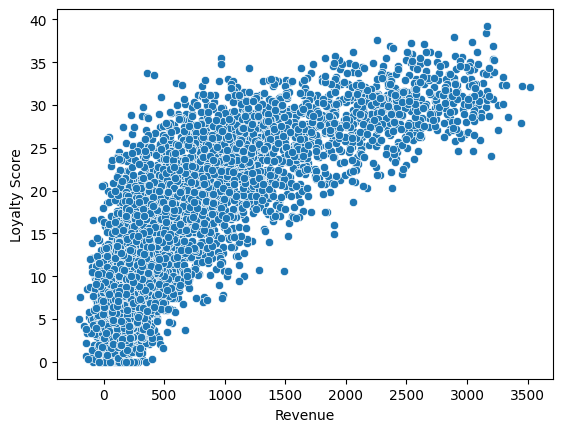

In [ ]:
#Loyalty score vs Revenue
sns.scatterplot(data=df,x='Revenue',y='Loyalty Score')

<Axes: xlabel='Store Rating', ylabel='Loyalty Score'>

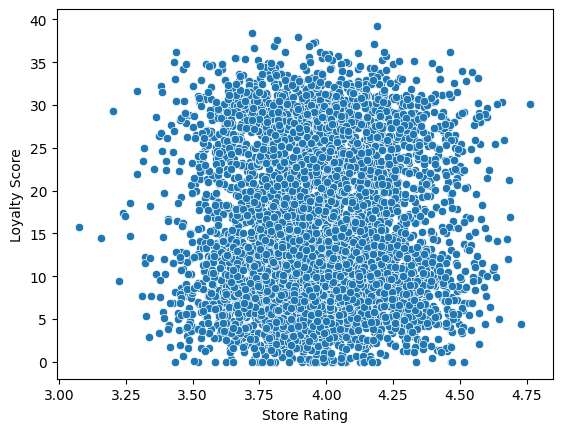

In [ ]:
#Loyalty score vs Store Rating
sns.scatterplot(data=df,x='Store Rating',y='Loyalty Score')

<Axes: xlabel='Age', ylabel='Loyalty Score'>

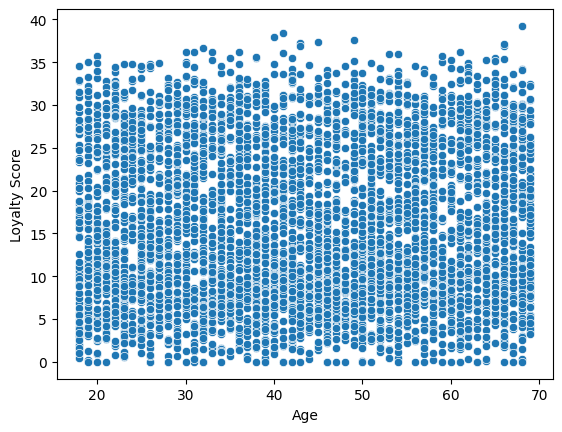

In [ ]:
#Loyalty score vs Age
sns.scatterplot(data=df,x='Age',y='Loyalty Score')

<Axes: ylabel='Loyalty Score'>

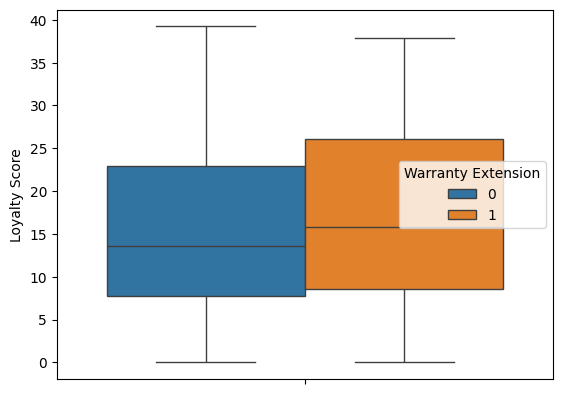

In [ ]:
#Loyalty score vs Warranty Extension
sns.boxplot(data=df,y='Loyalty Score',hue='Warranty Extension')

From above boxplot, it is found that Warranty Extension has slight impact on Loyalty Score

<ipython-input-42-a7113ca897e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WE_1['Loyalty Score'],hist=True,color='red')
<ipython-input-42-a7113ca897e7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WE_0['Loyalty Score'],hist=True,color='blue')


<Axes: xlabel='Loyalty Score', ylabel='Density'>

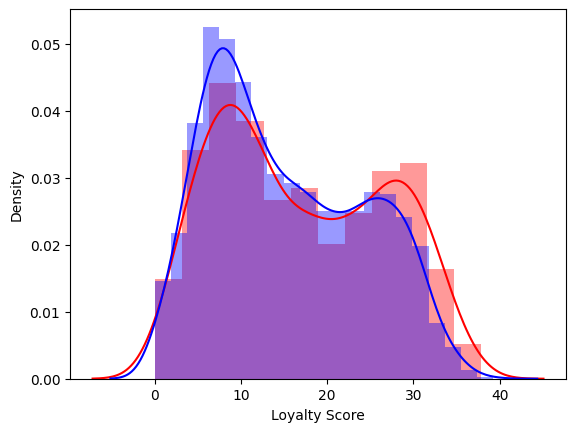

In [ ]:
#Two kde plots re drawn - red kde plot is that of Loyalty Score of customers having Warranty Extension
#blue kde plot is that of Loyalty Score of customers having no Warranty Extension
WE_1=df[df['Warranty Extension']==1]
WE_0=df[df['Warranty Extension']==0]

sns.distplot(WE_1['Loyalty Score'],hist=True,color='red')
sns.distplot(WE_0['Loyalty Score'],hist=True,color='blue')

From above kde plots, it is found that customers with warranty extension (red plot) is having a slight higher probability for more Loyalty Score

<Axes: ylabel='Loyalty Score'>

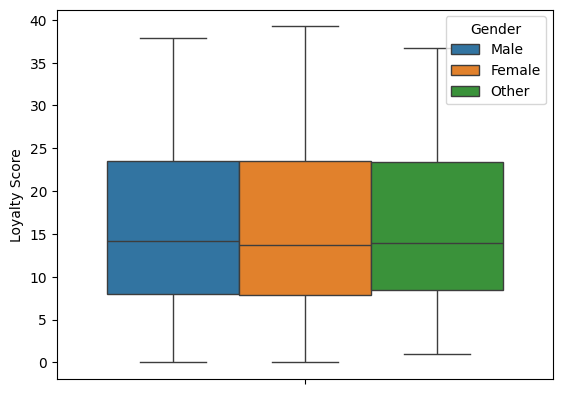

In [ ]:
#Loyalty score vs Gender
sns.boxplot(data=df,y='Loyalty Score',hue='Gender')

<Axes: ylabel='Loyalty Score'>

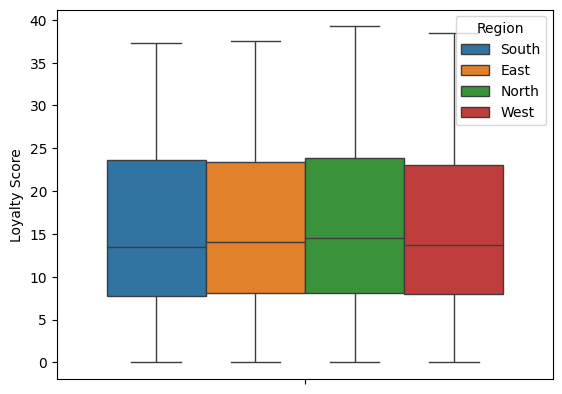

In [ ]:
#Loyalty score vs Region
sns.boxplot(data=df,y='Loyalty Score',hue='Region')

<Axes: ylabel='Loyalty Score'>

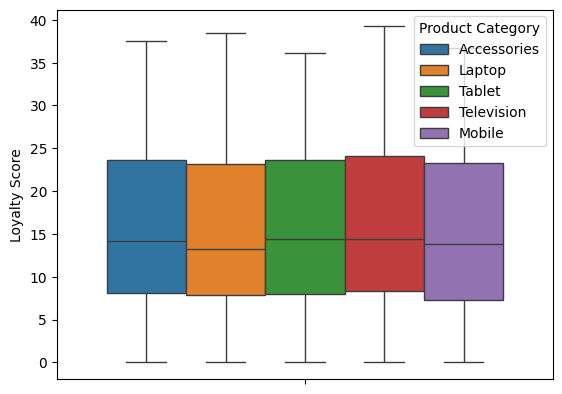

In [ ]:
#Loyalty score vs Product Category
sns.boxplot(data=df,y='Loyalty Score',hue='Product Category')

<Axes: ylabel='Loyalty Score'>

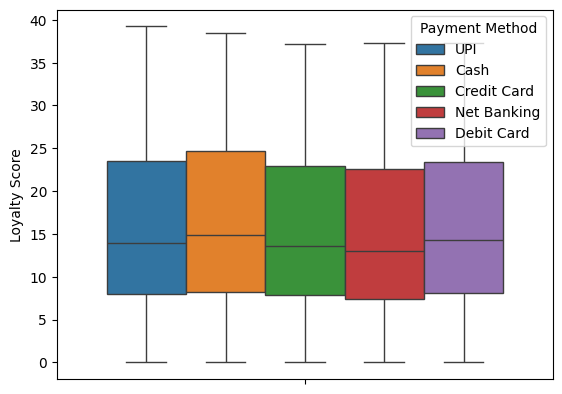

In [ ]:
#Loyalty score vs Payment Method
sns.boxplot(data=df,y='Loyalty Score',hue='Payment Method')

<Axes: ylabel='Loyalty Score'>

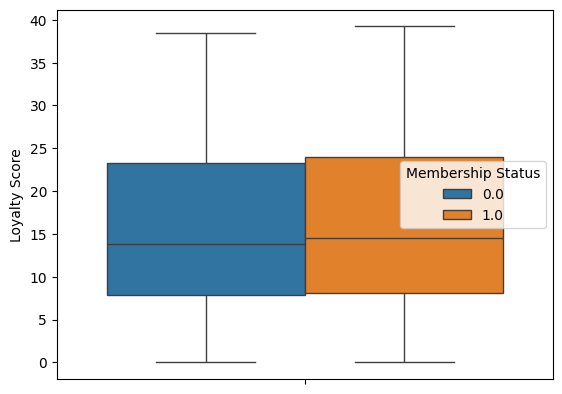

In [ ]:
#Loyalty score vs Membership Status
sns.boxplot(data=df,y='Loyalty Score',hue='Membership Status')

<Axes: ylabel='Loyalty Score'>

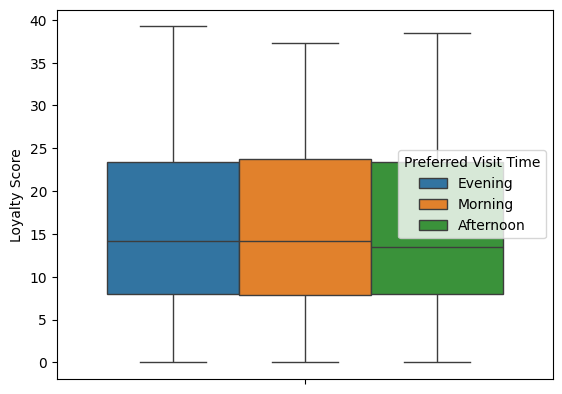

In [ ]:
#Loyalty score vs Preferred Visit Time
sns.boxplot(data=df,y='Loyalty Score',hue='Preferred Visit Time')

From bivariate analysis done so far, following are the conclusions:
1. loyalty score increases when items purchased is more
2. Loyalty and total spent has positive relation
3. Loyalty and discount has negative relation
4. Loyalty and Revenue has positive relation
5. Store Rating and Age is not affecting Loyalty much
6. Warranty extension has a slight positive effect on Loyalty
7. Remaining features (Gender, Region, Product category, Payment method, Membership status and preferred visit time) has no pronounced effect on Loyalty


In [ ]:
#Finally, a pair plot is drawn to have an understanding of how each features relate one another
#sns.pairplot(data=df)

**Feature Engineering**

In [ ]:
'''Two new features are created :
   1. Total Spent to Items Purchased Ratio
   2. Discounted Spend
'''
df['Total Spent to Items Purchased Ratio']=df['Total Spent']/df['Items Purchased']
df['Discounted Spend']=df['Total Spent']-((df['Discount (%)']/100)*df['Total Spent'])


In [ ]:
df

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,Total Spent to Items Purchased Ratio,Discounted Spend
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening,29.226195,15.467268
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening,42.014261,386.591121
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning,31.935704,80.189636
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon,46.413631,383.353581
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning,46.771644,577.629798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24,1,39.583865,46.041613,1.000000,0,Male,West,Television,Credit Card,-64.457793,4.187345,9.136240,0.0,Morning,39.583865,21.358815
4996,66,5,172.486538,32.751346,1.000000,0,Male,East,Accessories,Debit Card,138.772917,3.868131,1.961965,0.0,Evening,34.497308,115.994875
4997,26,11,493.388104,5.000000,2.324783,0,Male,North,Television,Net Banking,1010.219124,4.172183,16.750489,0.0,Evening,44.853464,468.718699
4998,53,10,260.269589,23.973041,5.000000,1,Female,West,Accessories,Debit Card,1114.585926,3.942221,25.562475,1.0,Afternoon,26.026959,197.875054


In [ ]:
corr_matrix=df.select_dtypes(exclude='object').corr()
corr_matrix

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status,Total Spent to Items Purchased Ratio,Discounted Spend
Age,1.000000,-0.005522,-0.003212,0.000439,0.000331,-0.034065,-0.006344,-0.023029,0.009317,0.000485,0.008727,-0.004435
Items Purchased,-0.005522,1.000000,0.836032,-0.853837,0.494572,0.064381,0.674361,0.017564,0.557782,0.006543,0.017510,0.807117
Total Spent,-0.003212,0.836032,1.000000,-0.979015,0.597239,0.121439,0.882421,0.013547,0.669716,-0.000557,0.499109,0.994834
Discount (%),0.000439,-0.853837,-0.979015,1.000000,-0.589436,-0.086038,-0.829426,-0.013681,-0.659179,0.004464,-0.475023,-0.966156
Satisfaction Score,0.000331,0.494572,0.597239,-0.589436,1.000000,0.062950,0.786229,0.010493,0.935086,0.026250,0.305097,0.596171
Warranty Extension,-0.034065,0.064381,0.121439,-0.086038,0.062950,1.000000,0.130036,0.016729,0.076038,0.011061,0.090397,0.127241
Revenue,-0.006344,0.674361,0.882421,-0.829426,0.786229,0.130036,1.000000,0.010915,0.808505,0.014882,0.470011,0.900659
Store Rating,-0.023029,0.017564,0.013547,-0.013681,0.010493,0.016729,0.010915,1.000000,0.007269,0.001616,-0.000595,0.012534
Loyalty Score,0.009317,0.557782,0.669716,-0.659179,0.935086,0.076038,0.808505,0.007269,1.000000,0.020058,0.337672,0.667501
Membership Status,0.000485,0.006543,-0.000557,0.004464,0.026250,0.011061,0.014882,0.001616,0.020058,1.000000,-0.010312,0.000236


In [ ]:
#In order to convert the problem to a classification problem, two features Satisfaction Score and
#Loyalty score are converted to integet types.
#This will convert Satisfaction score to 5 classes (1,2,3,4,5)
df['Satisfaction Score']=df['Satisfaction Score'].astype('int')
df['Loyalty Score']=df['Loyalty Score'].astype('int')
df

,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
0,1,29.226195,47.077380,1,1,149.252145,3.660461,3,1.0
1,10,420.142612,7.985739,3,1,1485.524222,3.551553,25,1.0
2,4,127.742817,37.225718,1,1,85.550131,3.922839,7,1.0
3,9,417.722683,8.227732,1,0,824.118724,3.860422,7,1.0
4,13,608.031366,5.000000,3,0,2463.590392,3.812820,29,0.0
...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041613,1,0,-64.457793,4.187345,9,0.0
4996,5,172.486538,32.751346,1,0,138.772917,3.868131,1,0.0
4997,11,493.388104,5.000000,2,0,1010.219124,4.172183,16,0.0
4998,10,260.269589,23.973041,5,1,1114.585926,3.942221,25,1.0


In [ ]:
#Features which are least related to target variable (Satisfaction score), as per correlation matrix, are deleted
del_col=['Age','Gender','Region','Product Category','Payment Method','Preferred Visit Time']
#del_col=['Preferred Visit Time']
df.drop(columns=del_col,inplace=True)
df

,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
0,1,29.226195,47.077380,1.000000,1,149.252145,3.660461,3.597133,1.0
1,10,420.142612,7.985739,3.760294,1,1485.524222,3.551553,25.764903,1.0
2,4,127.742817,37.225718,1.771240,1,85.550131,3.922839,7.022399,1.0
3,9,417.722683,8.227732,1.926831,0,824.118724,3.860422,7.635412,1.0
4,13,608.031366,5.000000,3.902927,0,2463.590392,3.812820,29.461119,0.0
...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041613,1.000000,0,-64.457793,4.187345,9.136240,0.0
4996,5,172.486538,32.751346,1.000000,0,138.772917,3.868131,1.961965,0.0
4997,11,493.388104,5.000000,2.324783,0,1010.219124,4.172183,16.750489,0.0
4998,10,260.269589,23.973041,5.000000,1,1114.585926,3.942221,25.562475,1.0


In [ ]:
# Segmented customer data based on features such as Region and Product Category
#Loyalty score segmented based on Region and Product Category
pd.set_option('display.max_columns',None)
df.groupby(['Region','Product Category'])['Loyalty Score'].agg(['min','max','mean','median','std'])

min        max       mean     median       std
Region Product Category                                                     
East   Accessories       0.000000  37.578976  16.600523  14.738607  9.490028
       Laptop            0.000000  34.342763  15.829647  13.608720  9.077223
       Mobile            0.000000  36.681612  15.322231  13.958162  9.108769
       Tablet            0.000000  36.136085  15.656017  14.414952  9.278438
       Television        0.000000  35.516979  15.154417  13.083931  8.965633
North  Accessories       0.841803  37.178340  16.037103  14.704595  8.988430
       Laptop            0.000000  34.980678  15.453767  14.258461  8.823791
       Mobile            0.000000  34.187085  15.832354  14.591171  9.377984
       Tablet            0.000000  36.173764  16.379996  16.225378  8.989565
       Television        0.000000  39.235391  15.925205  13.439300  9.615487
South  Accessories       0.000000  34.757758  15.427258  13.181111  9.199291
       Laptop            0.000000  35.034488  14.576948  12.496439  8.811208
       Mobile            0.000000  36.158592  15.222514  13.448671  9.515777
       Tablet            0.000000  36.096598  15.472861  13.499263  9.254354
       Television        0.000000  37.338296  16.665107  15.919533  9.553925
West   Accessories       0.000000  35.548052  15.238295  13.189129  9.190001
       Laptop            0.987948  38.400774  15.306604  12.851285  9.017874
       Mobile            0.000000  34.612956  15.073330  13.352783  8.646240
       Tablet            0.000000  35.988961  15.720870  13.846545  9.081463
       Television        0.000000  37.895506  16.048103  14.857775  8.704391

<ipython-input-58-b3fba87f06e7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Wt,color='red')
<ipython-input-58-b3fba87f06e7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Et,color='blue')
<ipython-input-58-b3fba87f06e7>:9: UserWarning: 

`distplot` is a deprecated function and will be rem

<Axes: xlabel='Loyalty Score', ylabel='Density'>

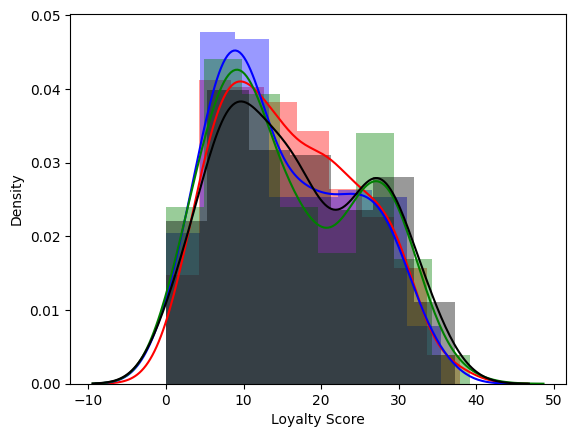

In [ ]:
Wt=df[(df['Region']=='West') & (df['Product Category']=='Television')]['Loyalty Score']
Et=df[(df['Region']=='East') & (df['Product Category']=='Television')]['Loyalty Score']
St=df[(df['Region']=='North') & (df['Product Category']=='Television')]['Loyalty Score']
Nt=df[(df['Region']=='South') & (df['Product Category']=='Television')]['Loyalty Score']
#sns.displot(Wt,kde=True)
#sns.displot(Et,kde=True)
sns.distplot(Wt,color='red')
sns.distplot(Et,color='blue')
sns.distplot(St,color='green')
sns.distplot(Nt,color='black')

In [ ]:
#Above plot shows kde distribution of loyalty score corresponding to product Television in each Regions

**Feature Selection**

Best five features are found using mutual_info_regression and f_regression of seleckkbest method. Loyalty score is chosen as target variable



In [ ]:
from sklearn.model_selection import train_test_split
X=data_encoded.drop('Loyalty Score',axis=1)
y=data_encoded['Loyalty Score']

In [ ]:
#f_regression is used to find best 5 features that may affect target variable
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
X_clf_new=SelectKBest(score_func=f_regression,k=5).fit_transform(X,y) #no of best features to be selected as 5
print(X_clf_new[:5]) #X_clf_new is an numpy array which has values corresponding to best 5 features and values in first 5 rows are printed

[[2.92261951e+01 4.70773805e+01 1.00000000e+00 1.49252145e+02
  1.54672680e+01]
 [4.20142612e+02 7.98573877e+00 3.76029424e+00 1.48552422e+03
  3.86591121e+02]
 [1.27742817e+02 3.72257183e+01 1.77124030e+00 8.55501308e+01
  8.01896358e+01]
 [4.17722683e+02 8.22773171e+00 1.92683117e+00 8.24118724e+02
  3.83353581e+02]
 [6.08031366e+02 5.00000000e+00 3.90292684e+00 2.46359039e+03
  5.77629798e+02]]


In [ ]:
print(X.head()) #first 5 values in our original data frame are printed and compared with above values to identify the feature names

   Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56                1    29.226195     47.077380            1.000000   
1   69               10   420.142612      7.985739            3.760294   
2   46                4   127.742817     37.225718            1.771240   
3   32                9   417.722683      8.227732            1.926831   
4   60               13   608.031366      5.000000            3.902927   

   Warranty Extension      Revenue  Store Rating  \
0                   1   149.252145      3.660461   
1                   1  1485.524222      3.551553   
2                   1    85.550131      3.922839   
3                   0   824.118724      3.860422   
4                   0  2463.590392      3.812820   

   Total Spent to Items Purchased Ratio  Discounted Spend  Gender_Female  \
0                             29.226195         15.467268            0.0   
1                             42.014261        386.591121            1.0   
2             

Best 5 features identified using f_regression are: Total Spent,  Discount (%),  Satisfaction Score, Revenue and Discounted Spend

In [ ]:
#mutual_info_regression is used to find best 5 features that may affect target variable
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_clf_new=SelectKBest(score_func=mutual_info_regression,k=5).fit_transform(X,y)
print(X_clf_new[:5])

[[2.92261951e+01 4.70773805e+01 1.00000000e+00 1.49252145e+02
  1.54672680e+01]
 [4.20142612e+02 7.98573877e+00 3.76029424e+00 1.48552422e+03
  3.86591121e+02]
 [1.27742817e+02 3.72257183e+01 1.77124030e+00 8.55501308e+01
  8.01896358e+01]
 [4.17722683e+02 8.22773171e+00 1.92683117e+00 8.24118724e+02
  3.83353581e+02]
 [6.08031366e+02 5.00000000e+00 3.90292684e+00 2.46359039e+03
  5.77629798e+02]]


In [ ]:
print(X.head())

   Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56                1    29.226195     47.077380            1.000000   
1   69               10   420.142612      7.985739            3.760294   
2   46                4   127.742817     37.225718            1.771240   
3   32                9   417.722683      8.227732            1.926831   
4   60               13   608.031366      5.000000            3.902927   

   Warranty Extension      Revenue  Store Rating  \
0                   1   149.252145      3.660461   
1                   1  1485.524222      3.551553   
2                   1    85.550131      3.922839   
3                   0   824.118724      3.860422   
4                   0  2463.590392      3.812820   

   Total Spent to Items Purchased Ratio  Discounted Spend  Gender_Female  \
0                             29.226195         15.467268            0.0   
1                             42.014261        386.591121            1.0   
2             

Best 5 features identified using mutual_info_regression are: Total Spent,  Discount (%),  Satisfaction Score, Revenue and Discounted Spend

In [ ]:
corr_col=df.select_dtypes(exclude='object').corr()
corr_col

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status,Total Spent to Items Purchased Ratio,Discounted Spend
Age,1.000000,-0.005522,-0.003212,0.000439,0.000331,-0.034065,-0.006344,-0.023029,0.009317,0.000485,0.008727,-0.004435
Items Purchased,-0.005522,1.000000,0.836032,-0.853837,0.494572,0.064381,0.674361,0.017564,0.557782,0.006543,0.017510,0.807117
Total Spent,-0.003212,0.836032,1.000000,-0.979015,0.597239,0.121439,0.882421,0.013547,0.669716,-0.000557,0.499109,0.994834
Discount (%),0.000439,-0.853837,-0.979015,1.000000,-0.589436,-0.086038,-0.829426,-0.013681,-0.659179,0.004464,-0.475023,-0.966156
Satisfaction Score,0.000331,0.494572,0.597239,-0.589436,1.000000,0.062950,0.786229,0.010493,0.935086,0.026250,0.305097,0.596171
Warranty Extension,-0.034065,0.064381,0.121439,-0.086038,0.062950,1.000000,0.130036,0.016729,0.076038,0.011061,0.090397,0.127241
Revenue,-0.006344,0.674361,0.882421,-0.829426,0.786229,0.130036,1.000000,0.010915,0.808505,0.014882,0.470011,0.900659
Store Rating,-0.023029,0.017564,0.013547,-0.013681,0.010493,0.016729,0.010915,1.000000,0.007269,0.001616,-0.000595,0.012534
Loyalty Score,0.009317,0.557782,0.669716,-0.659179,0.935086,0.076038,0.808505,0.007269,1.000000,0.020058,0.337672,0.667501
Membership Status,0.000485,0.006543,-0.000557,0.004464,0.026250,0.011061,0.014882,0.001616,0.020058,1.000000,-0.010312,0.000236


Using correlation matrix, five features that most affect target are Satisfaction score, Revenue, Total spent, Discount and Items purchased




**MODEL SELECTION AND TUNING**

In [ ]:
#split the dataset to X and y.
#Satisfaction score is selected as target variable
from sklearn.model_selection import train_test_split
X=df.drop('Satisfaction Score',axis=1)
y=df['Satisfaction Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.8)

**Random Forest classification**

In [ ]:
#Random Forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred_rf))
print('Precision is', precision_score(y_test, y_pred_rf,average='micro'))
print('Recall is', recall_score(y_test, y_pred_rf,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_rf,average='micro'))

Accuracy is 0.766
Precision is 0.766
Recall is 0.766
f1 score is 0.766


In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[399,  30,   1,   0,   0],
       [ 41,  87,  21,   0,   0],
       [  0,  40,  79,  12,   0],
       [  0,   3,  25,  55,  33],
       [  0,   1,   3,  24, 146]])

In [ ]:
#cross validation using kfold (random forest)
from sklearn.model_selection import KFold
kfold_val=KFold(10) #we take no of folds as 10 here
for train_index,test_index in kfold_val.split(X,y):
  print('Training index:',train_index)
  print('Test index:',test_index)

Training index: [ 500  501  502 ... 4997 4998 4999]
Test index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230

In [ ]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(rf_clf,X,y,cv=kfold_val)
kv_result

array([0.742, 0.786, 0.756, 0.778, 0.794, 0.76 , 0.812, 0.758, 0.76 ,
       0.782])

In [ ]:
np.mean(kv_result)

0.7727999999999999

In [ ]:
#cross validation using stratified kfold (random forest)
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(10)
skv_result=cross_val_score(rf_clf,X,y,cv=sk_fold)
skv_result

array([0.772, 0.778, 0.782, 0.78 , 0.784, 0.762, 0.796, 0.754, 0.754,
       0.778])

In [ ]:
np.mean(skv_result)

0.774

**Hyper parameter tuning using GridSearch (Random Forest)**




In [ ]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_samples=[0.5,0.75,1.0]
max_depth=[2,8,None]

In [ ]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_samples':max_samples,
            'max_depth':max_depth}

In [ ]:
rf=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 120}

In [ ]:
rf_grid.best_score_

0.77425

**Hyper parameter tuning using RandomizedSearchCV (Random Forest)**

In [ ]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_samples=[0.5,0.75,1.0]
max_depth=[2,8,None]

In [ ]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_samples':max_samples,
            'max_depth':max_depth}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_rand=RandomizedSearchCV(n_iter=20,estimator=rf,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)
rf_rand.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_rand.best_params_

{'n_estimators': 120,
 'max_samples': 0.5,
 'max_features': 0.6,
 'max_depth': None}

In [ ]:
rf_rand.best_score_

0.7747499999999999

In [ ]:
#Rerun Random Forest Algorithm with modified parameters found using hyper para tuning
rf_clf = RandomForestClassifier(n_estimators= 120,max_samples= 0.5,max_features= 0.6,max_depth= None)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 0.762
Precision is 0.762
Recall is 0.762
f1 score is 0.762


In [ ]:
import pickle
with open('model.pkl','wb') as model_file: #wb represents we want to write to the pickle file
  pickle.dump(rf_clf,model_file)

**KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15) #we try from k=3 to 15 and want to find which k value is giving good results

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=4) #p=2 represents euclidian distance to be used (refer doc)
  classifier.fit(X_train,y_train)
  y_pred_knn=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [ ]:
metric_k

[0.705,
 0.711,
 0.718,
 0.715,
 0.715,
 0.722,
 0.717,
 0.724,
 0.716,
 0.726,
 0.729,
 0.726]

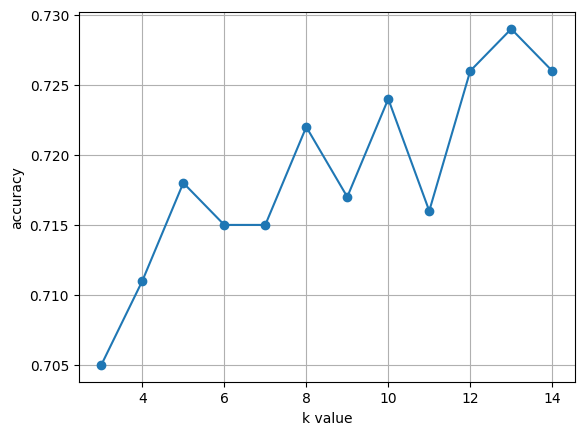

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
#try predicting  with k value which is found most accurate in previous step
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=4)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred_knn)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_knn,average='micro'))

Accuracy is 0.729
Precision is 0.729
Recall is 0.729
f1 score is 0.729


In [ ]:
#cross validation using kfold (kNN)
from sklearn.model_selection import KFold
kfold_val=KFold(10) #we take no of folds as 10 here
#for train_index,test_index in kfold_val.split(X,y):
  #print('Training index:',train_index)
  #print('Test index:',test_index)

Training index: [ 500  501  502 ... 4997 4998 4999]
Test index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230

In [ ]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(classifier,X,y,cv=kfold_val)
kv_result

array([0.706, 0.74 , 0.702, 0.72 , 0.756, 0.758, 0.75 , 0.728, 0.718,
       0.744])

In [ ]:
np.mean(kv_result)

0.7322

In [ ]:
#cross validation using stratified kfold (kNN)
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(10)
skv_result=cross_val_score(classifier,X,y,cv=sk_fold)
skv_result

array([0.718, 0.724, 0.724, 0.712, 0.74 , 0.746, 0.744, 0.742, 0.72 ,
       0.736])

In [ ]:
np.mean(skv_result)

0.7305999999999999

In [ ]:
#Hyper parameter tuning using GridSearch (kNN)
n_neighbors=[12,14,16,18]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']


In [ ]:
param_grid={'n_neighbors':n_neighbors,
            'weights':weights,
            'algorithm':algorithm}

In [ ]:
knn_cv=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator=knn_cv,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [12, 14, 16, 18],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'distance'}

In [ ]:
knn_grid.best_score_

0.74325

In [ ]:
#Rerun kNN model using modified parameters obtained from hyper parameter tuning
classifier=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 14, weights= 'distance',metric='minkowski',p=4)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred_knn)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_knn,average='micro'))

Accuracy is 0.733
Precision is 0.733
Recall is 0.733
f1 score is 0.733


**SVM algorithm**

In [ ]:
from sklearn.svm import SVC #Support Vector Classifier. We have SVR also for regressor
sv_clf=SVC()
sv_clf.fit(X_train,y_train)
y_pred_svc=sv_clf.predict(X_test)


In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred_svc))
print('Precision is', precision_score(y_test, y_pred_svc,average='micro'))
print('Recall is', recall_score(y_test, y_pred_svc,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_svc,average='micro'))

Accuracy is 0.688
Precision is 0.688
Recall is 0.688
f1 score is 0.688


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.449 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.449 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.448 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.448 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.448 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.449 total time=   2.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.449 total time=   2.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.448 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.448 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.448 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.449 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_score_

0.78225

In [ ]:
#Rerun SVM model using modified parameters obtained from hyper parameter tuning
from sklearn.svm import SVC #Support Vector Classifier. We have SVR also for regressor
sv_clf=SVC(C= 100, gamma= 0.0001, kernel= 'rbf')
sv_clf.fit(X_train,y_train)
y_pred_svc=sv_clf.predict(X_test)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred_svc))
print('Precision is', precision_score(y_test, y_pred_svc,average='micro'))
print('Recall is', recall_score(y_test, y_pred_svc,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_svc,average='micro'))

Accuracy is 0.777
Precision is 0.777
Recall is 0.777
f1 score is 0.777


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 0.694
Precision is 0.694
Recall is 0.694
f1 score is 0.694


Following are the accuracy scores obtained:
1. Random Forest - 0.76
2. kNN - 0.74
3. SVM - 0.78
4. Decision Tree - 0.69

As per above, SVM is selected for further development of the application